<a href="https://colab.research.google.com/github/HenriPett/CNNmodel/blob/main/Cnnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Recomendo que voce execute todo o codigo com a GPU do Google Colab, para isso:
Ambiente de execução -> Alterar o tipo de ambiente de execução -> Acelerador de
Hardware -> GPU -> Salvar

Devo apontar que é normal o codigo demorar para ser executado, os processos de aprendizado
e download são lentos.

A acuracia desse modelo ficou em 93%, então as vezes ele ira errar.
"""

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from random import randint

In [ ]:
#Pegamos o dataset CIFAR10, ele tem 60.000 imagens e 10 categorias

#dividimos os dados em: dados de treino/dados de classificaçao e dados de teste/dados de classificaçao

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#pegando os dados e transformando os pixels das imagens em numeros entre 0 e 1

train_images = train_images / 255
test_images = test_images / 255

In [ ]:
#Transformando os labels, que antes eram numeros, em palavras que as classificam.
labels = ['Avião', 'Carro', 'Passaro', 'Gato', 'Veado', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

In [ ]:
#inicializando o modelo como CNN e adicionando camadas a ela

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
#NÃO É NECESSARIO 
""" 
O método summary() traz varias informaçoes do modelo, como os informaçoes
de saida e parametros de cada camada. Tambem informa o total de parametros,
parametros treinaveis e parametros não treinaveis. 
"""

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""
Como apresentado acima no summary(), a tendencia do numero de outputs é diminuir
a cada camada. Na ultima camada é possivel ver q o output é um array de 3 dimensões
(4, 4, 64), ou seja, 1024 saidas (4x4x64=1024). Como o nosso dataset só tem 10 categorias
o output da CNN deve ser 10 e apenas uma camada. Para transformar 3 camadas em uma,
usamos uma camada Flatten (Achatar), e para transformar 1024 outputs em 10 adicionamos
mais duas camadas densas (Dense).
"""
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#No metodo summary(), vemos que agora na ultima camada esta somente uma camada, e 10 outputs.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
#compilando o modelo e otimizando-o com o "adam", um otimizador generico, focando em acuracia (accuracy)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

"""
Agora dando fit no modelo, onde voce coloca de parametros os dados de treino/labels
e os dados de validaçao. O numero de Epochs (Epócas) depende do numero de vezes que 
voce quer que o modelo repasse pelos dados, assim aumentando a acuracia a cada passada.
Na teoria, o correto seria colocar varias epochs, porem nao funciona assim devido ao
overfitting, ou, vicio do modelo, onde ele vai ter uma acuracia muito alta,porem
somente para os dados treinados, não sendo verdade para futuros dados de input.
"""
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1882 - accuracy: 0.9332 - val_loss: 1.6974 - val_accuracy: 0.6893
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1643 - accuracy: 0.9423 - val_loss: 1.6809 - val_accuracy: 0.6828
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1658 - accuracy: 0.9415 - val_loss: 1.7376 - val_accuracy: 0.6930
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1480 - accuracy: 0.9480 - val_loss: 1.7758 - val_accuracy: 0.6816
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1557 - accuracy: 0.9457 - val_loss: 1.8524 - val_accuracy: 0.6914
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1435 - accuracy: 0.9499 - val_loss: 1.8679 - val_accuracy: 0.6884
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1553 - accuracy: 0.9448 - val_loss: 1.8847 - val_accuracy:

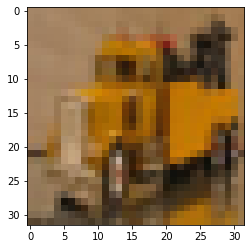

A imagem representa um: Caminhão


In [ ]:
"""
Como a variavel test_images possui 10000 imagens dentro dela, usamos o metodo randint(),
da biblioteca Random, para pegar um numero qualquer entre 0 e 9999. Com esse metodo,
conseguimos pegar uma imagem aleatoria, e joga-la dentro do modelo, para assim, ocorrer a
classificação da imagem.
"""
image_index = randint(0, 9999)
plt.imshow(test_images[image_index])
plt.show()

pred = model.predict(test_images[image_index].reshape(1, 32, 32, 3))
print(f'A imagem representa um: {labels[pred.argmax()]}')